In [6]:
import pm4py
import matplotlib.pyplot as plt                          
import numpy as np
import statsmodels.api as sm       
import seaborn as sns 
import pandas as pd

In [7]:
file_path = '/Users/nick/BPPSO/BPI Challenge 2017.xes'
log_concrete = pm4py.read_xes(file_path, return_legacy_log_object=True)

parsing log, completed traces ::   0%|          | 0/31509 [00:01<?, ?it/s]

In [8]:
trace_lengths = []
trace_times = []
for trace in log_concrete:
    trace_lengths.append(len(trace))
    duration_obj = trace[-1]['time:timestamp'] - trace[0]['time:timestamp']
    trace_times.append(duration_obj.total_seconds())

In [9]:
# Idea run linear regression between trace length and time needed

X = trace_lengths
Y = trace_times
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     437.1
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           2.11e-96
Time:                        09:34:52   Log-Likelihood:            -4.8387e+05
No. Observations:               31509   AIC:                         9.678e+05
Df Residuals:                   31507   BIC:                         9.678e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+06   1.59e+04    100.111      0.0

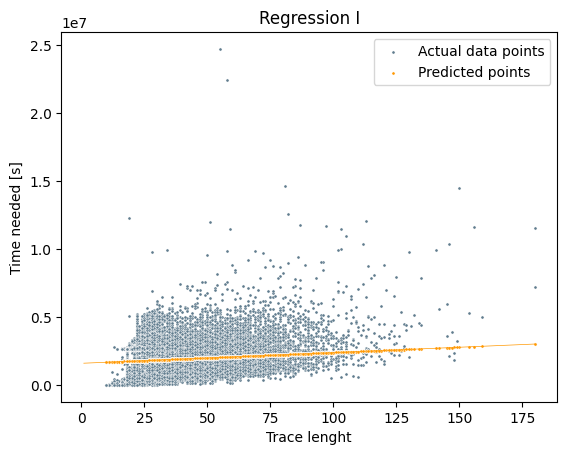

In [38]:
intercept, slope = results.params
predicted_Y = results.predict(X)

plt.scatter(trace_lengths, Y, c='#607c8e', label='Actual data points', s = 5, edgecolor='white',linewidth = 0.3)
plt.scatter(trace_lengths, predicted_Y, c='#FF9800', label='Predicted points', s=5, edgecolor='white',linewidth = 0.3)
x_min =X.min()
x_max = X.max()
x_line = np.linspace(x_min, x_max)
y_line = intercept + slope * x_line

plt.legend()
plt.xlabel('Trace lenght')
plt.ylabel('Time needed [s]')
plt.title('Regression I')
plt.plot(x_line, y_line, color='#FF9800', linestyle='-', linewidth = 0.5) 
plt.savefig('/Users/nick/BPPSO/figures/Regression_I.png', dpi=300)

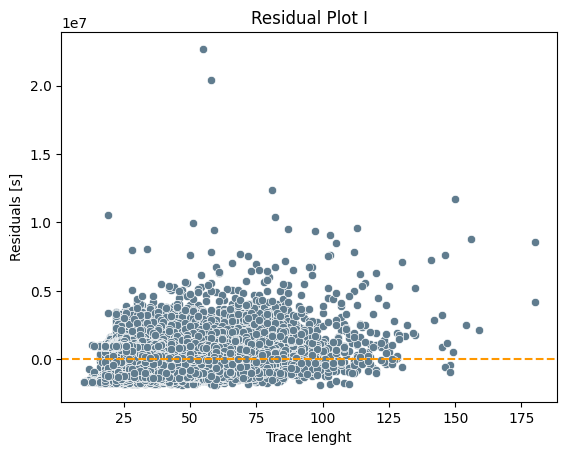

In [39]:
residuals = Y - predicted_Y
sns.scatterplot(x=X[:,1], y=residuals, color ='#607c8e')
plt.axhline(y=0, color='#FF9800', linestyle='--') 
plt.xlabel('Trace lenght')
plt.ylabel('Residuals [s]')
plt.title('Residual Plot I')

plt.savefig('/Users/nick/BPPSO/figures/Residual_I.png', dpi=300)
plt.show()

In [14]:
#Now trying to redo the linear regression without the two biggest outliers 

outlier_index = np.argmax(trace_times)
trace_times_adapted_1 = trace_times[:outlier_index] + trace_times[outlier_index+1:]
trace_len_adapted_1 = trace_lengths[:outlier_index] + trace_lengths[outlier_index+1:]

outlier2_index = np.argmax(trace_times_adapted_1)
trace_times_adapted = trace_times_adapted_1[:outlier2_index] + trace_times_adapted_1[outlier2_index+1:]
trace_len_adapted = trace_len_adapted_1[:outlier2_index] + trace_len_adapted_1[outlier2_index+1:]

In [15]:
#Second linear regression

X_new = trace_len_adapted
Y_new = trace_times_adapted

X_new = sm.add_constant(X_new)

model = sm.OLS(Y_new, X_new)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     437.4
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.82e-96
Time:                        09:37:07   Log-Likelihood:            -4.8347e+05
No. Observations:               31507   AIC:                         9.670e+05
Df Residuals:                   31505   BIC:                         9.670e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.59e+06   1.57e+04    101.416      0.0

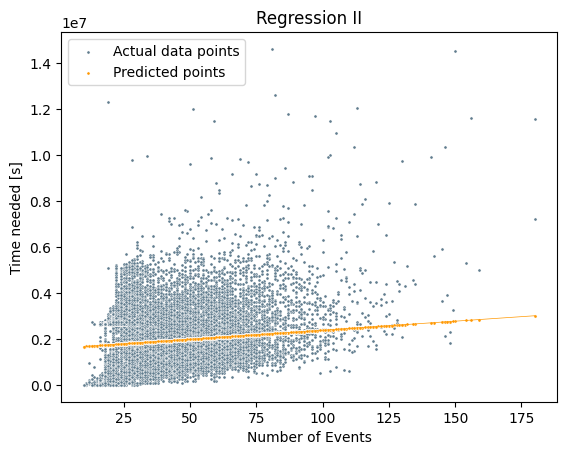

In [40]:
intercept, slope = results.params
predicted_values = results.predict(X_new)

plt.scatter(X_new[:,1], Y_new, c='#607c8e',edgecolor ='white', label='Actual data points', s= 5,linewidth = 0.3)
plt.scatter(X_new[:,1], predicted_values, c='#FF9800', edgecolor = 'white',label='Predicted points', s=5,linewidth = 0.3)

x_min = X_new[:,1].min()
x_max = X_new[:,1].max()
x_line = np.linspace(x_min, x_max)
y_line = intercept + slope * x_line

plt.legend()
plt.xlabel('Number of Events')
plt.ylabel('Time needed [s]')
plt.title('Regression II')
plt.plot(x_line, y_line, color='#FF9800', linestyle='-', label='Regression line', linewidth=0.5) 
plt.savefig('/Users/nick/BPPSO/figures/Regression_II.png', dpi=300)

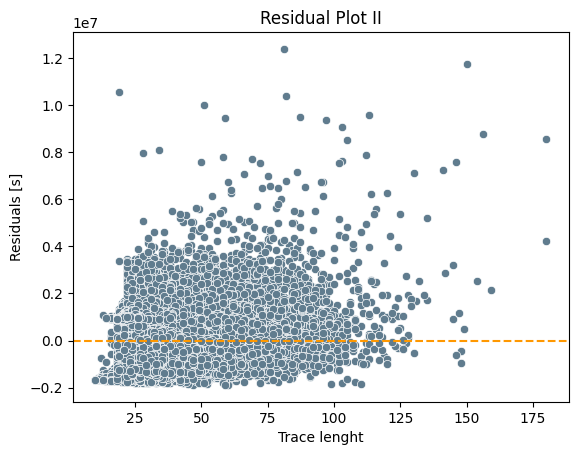

In [41]:
residuals = Y_new - predicted_values 

sns.scatterplot(x=X_new[:,1], y=residuals, color = '#607c8e')
plt.axhline(y=0, color='#FF9800', linestyle='--') 
plt.xlabel('Trace lenght')
plt.ylabel('Residuals [s]')
plt.title('Residual Plot II')
plt.savefig('/Users/nick/BPPSO/figures/Residual_II', dpi=300)
plt.show()

In [33]:
#New linear regression after transfomring the Y data with log

Y_log = np.log(Y_new)


model_log = sm.OLS(Y_log, X_new)
results_log = model_log.fit()

print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     631.6
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          5.22e-138
Time:                        09:45:23   Log-Likelihood:                -37441.
No. Observations:               31507   AIC:                         7.489e+04
Df Residuals:                   31505   BIC:                         7.490e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9792      0.011   1253.845      0.0

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


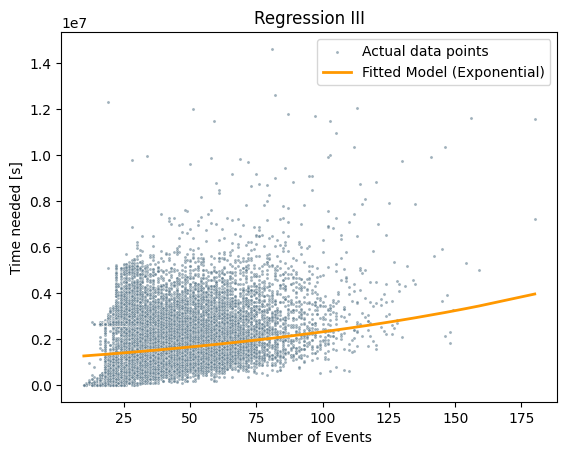

In [42]:
# 1. Get predictions from the log model (these are in log-scale)
predicted_values_log = results_log.predict(X_new)

# 2. Convert predictions back to the original scale using np.exp()
#    This is the correct inverse for np.log()
predicted_values_original = np.exp(predicted_values_log)

# 3. Plot the actual data
plt.scatter(X_new[:,1], Y_new, c='#607c8e', edgecolor = 'white', label='Actual data points', s=5, alpha=0.6,linewidth = 0.3)

# 4. Plot the FITTED MODEL CURVE
#    We sort the X values first so plt.plot draws a smooth line
sort_indices = np.argsort(X_new[:,1])
x_sorted = X_new[:,1][sort_indices]
y_predicted_sorted = predicted_values_original[sort_indices]

plt.plot(x_sorted, y_predicted_sorted, c='#FF9800', linestyle='-', label='Fitted Model (Exponential)', linewidth=2)

plt.legend()
plt.xlabel('Number of Events')
plt.ylabel('Time needed [s]')
plt.title('Regression III')
plt.savefig('/Users/nick/BPPSO/figures/Regression_III.png', dpi=300)
plt.show()

Skewness of Trace Lengths: 1.44


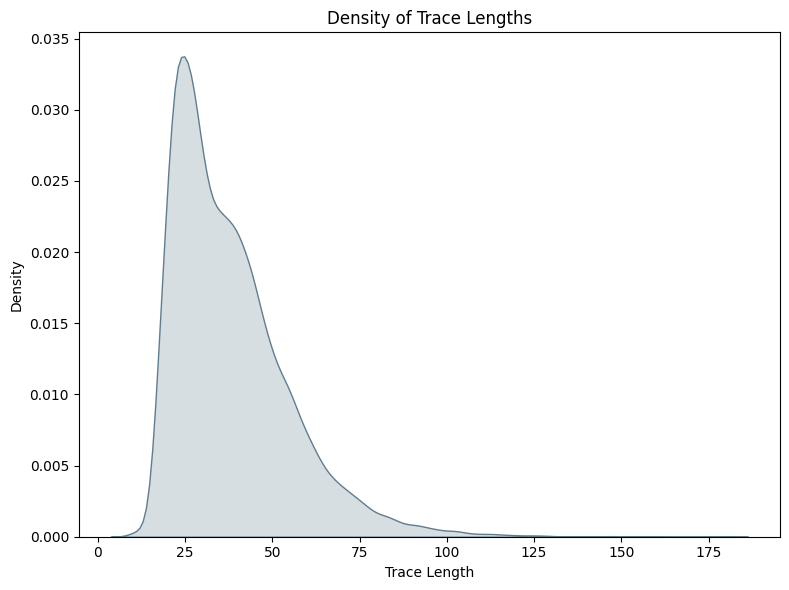

In [45]:

s_lengths = pd.Series(trace_lengths, name="Trace Length")
plot_color = '#607c8e'

print(f"Skewness of Trace Lengths: {s_lengths.skew():.2f}")

plt.figure(figsize=(8, 6))
sns.kdeplot(s_lengths, fill=True, clip=(0, None), color=plot_color)
plt.title('Density of Trace Lengths')
plt.xlabel('Trace Length')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('/Users/nick/BPPSO/figures/density_analysis_length.png', dpi=300)
plt.show()


Skewness of Time Needed: 1.69


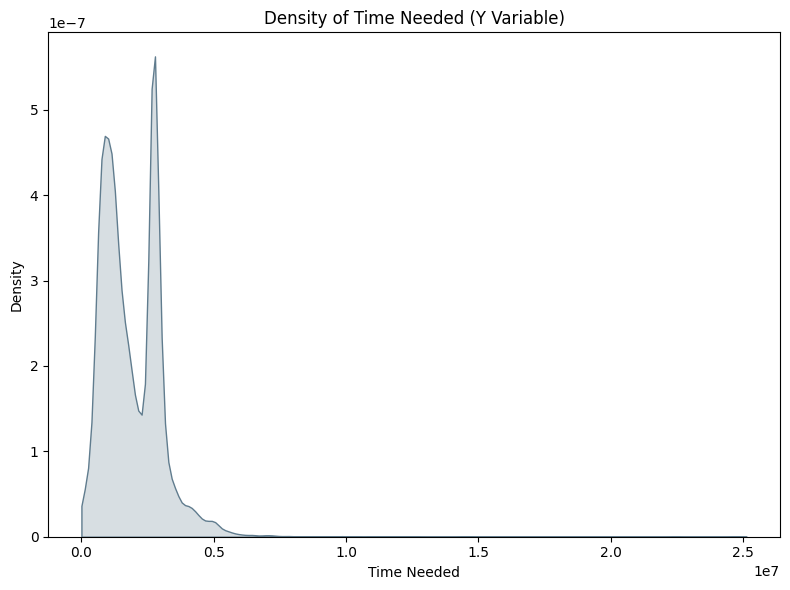

In [44]:
s_times = pd.Series(trace_times, name="Time Needed")
plot_color = '#607c8e'

print(f"Skewness of Time Needed: {s_times.skew():.2f}")

plt.figure(figsize=(8, 6))
sns.kdeplot(s_times, fill=True, clip=(0, None), color=plot_color)
plt.title('Density of Time Needed (Y Variable)')
plt.xlabel('Time Needed')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('/Users/nick/BPPSO/figures/density_analysis_time.png', dpi=300)
plt.show()


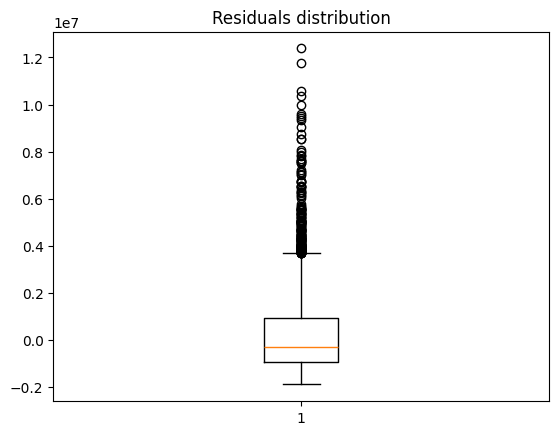

In [ ]:
plt.boxplot(residuals)
plt.title('Residuals distribution')
plt.show()